In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [2]:
data = pd.read_csv("../data/train.csv")

# Summary
- 227845 rows in the training set
- only 0.17% of the transactions are frauds
- 31 columns: 1 categorical (target), 1 seconds from min(date), 29 numerical 
- No missing values
- Anonymized numerical features V1-V28 have a mean value ~0
- Data has lots of outliers
- Potentially good predictors of Class: V4, V11, V7, Amount

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993,0.001729
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000,0.000000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000,0.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000,0.000000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [5]:

# Conduct normality test for each numerical column
normality_results = pd.DataFrame(columns=['Column', 'Statistic', 'p-value'])
for column in data.select_dtypes(include=['float64']).columns:
    stat, p_value = shapiro(data[column])
    normality_results = pd.concat([normality_results, pd.DataFrame({'Column': [column], 'Statistic': [stat], 'p-value': [p_value]})], ignore_index=True)

# Display the results
normality_results

c:\Users\ravil\Desktop\Projects\fraud_detector\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 227845.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ravil\AppData\Local\Temp\ipykernel_3520\1451092491.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  normality_results = pd.concat([normality_results, pd.DataFrame({'Column': [column], 'Statistic': [stat], 'p-value': [p_value]})], ignore_index=True)


,Column,Statistic,p-value
0,Time,0.940038,8.360324e-115
1,V1,0.798108,2.571995e-151
2,V2,0.735465,3.871362e-160
3,V3,0.908496,6.161730e-127
4,V4,0.969161,5.710674e-97
5,V5,0.816408,2.832109e-148
6,V6,0.841252,1.112014e-143
7,V7,0.716446,1.907252e-162
8,V8,0.501695,8.389040e-182
9,V9,0.970401,6.419308e-96


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

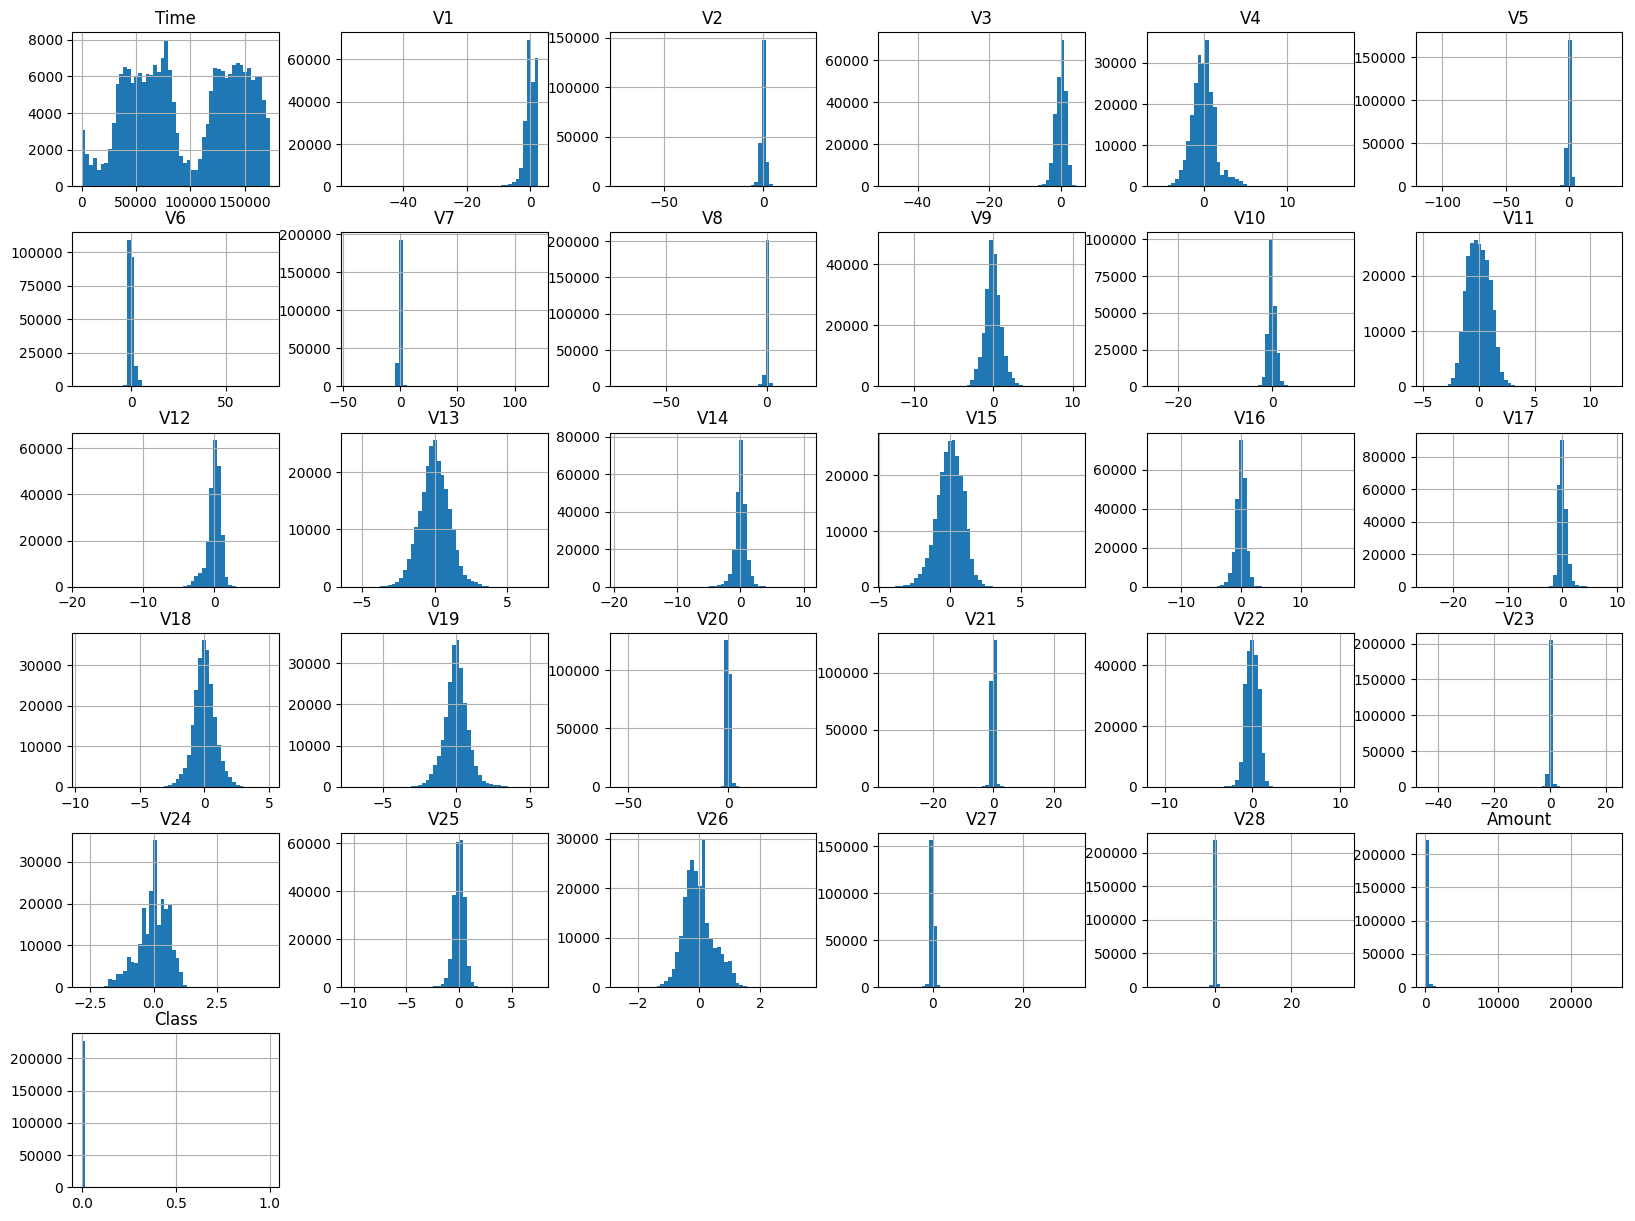

In [6]:
data.hist(figsize=(20, 15), bins=50)

<Axes: >

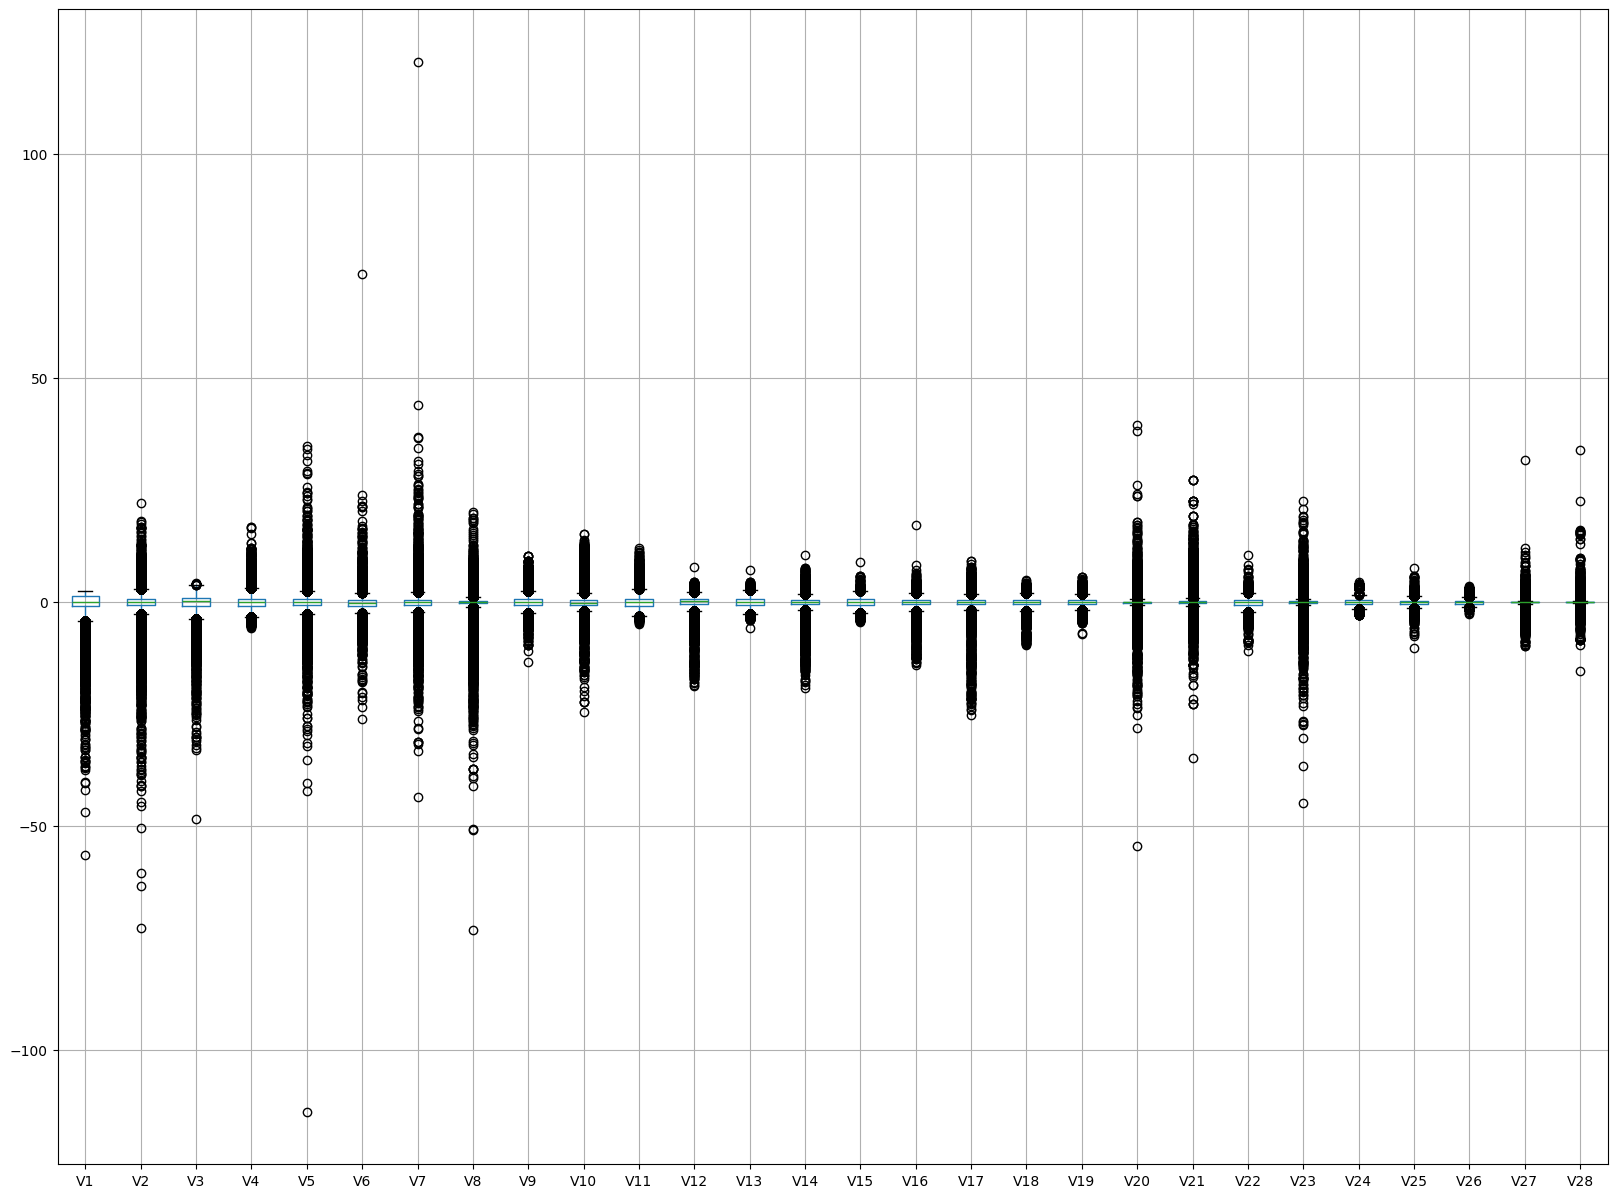

In [7]:
# box plots of the anonymized features
# the values are centered around zero, but there are a lot of outliers
data[data.columns[1:-2]].boxplot(figsize=(20, 15))

0.21880664486822182


<Axes: >

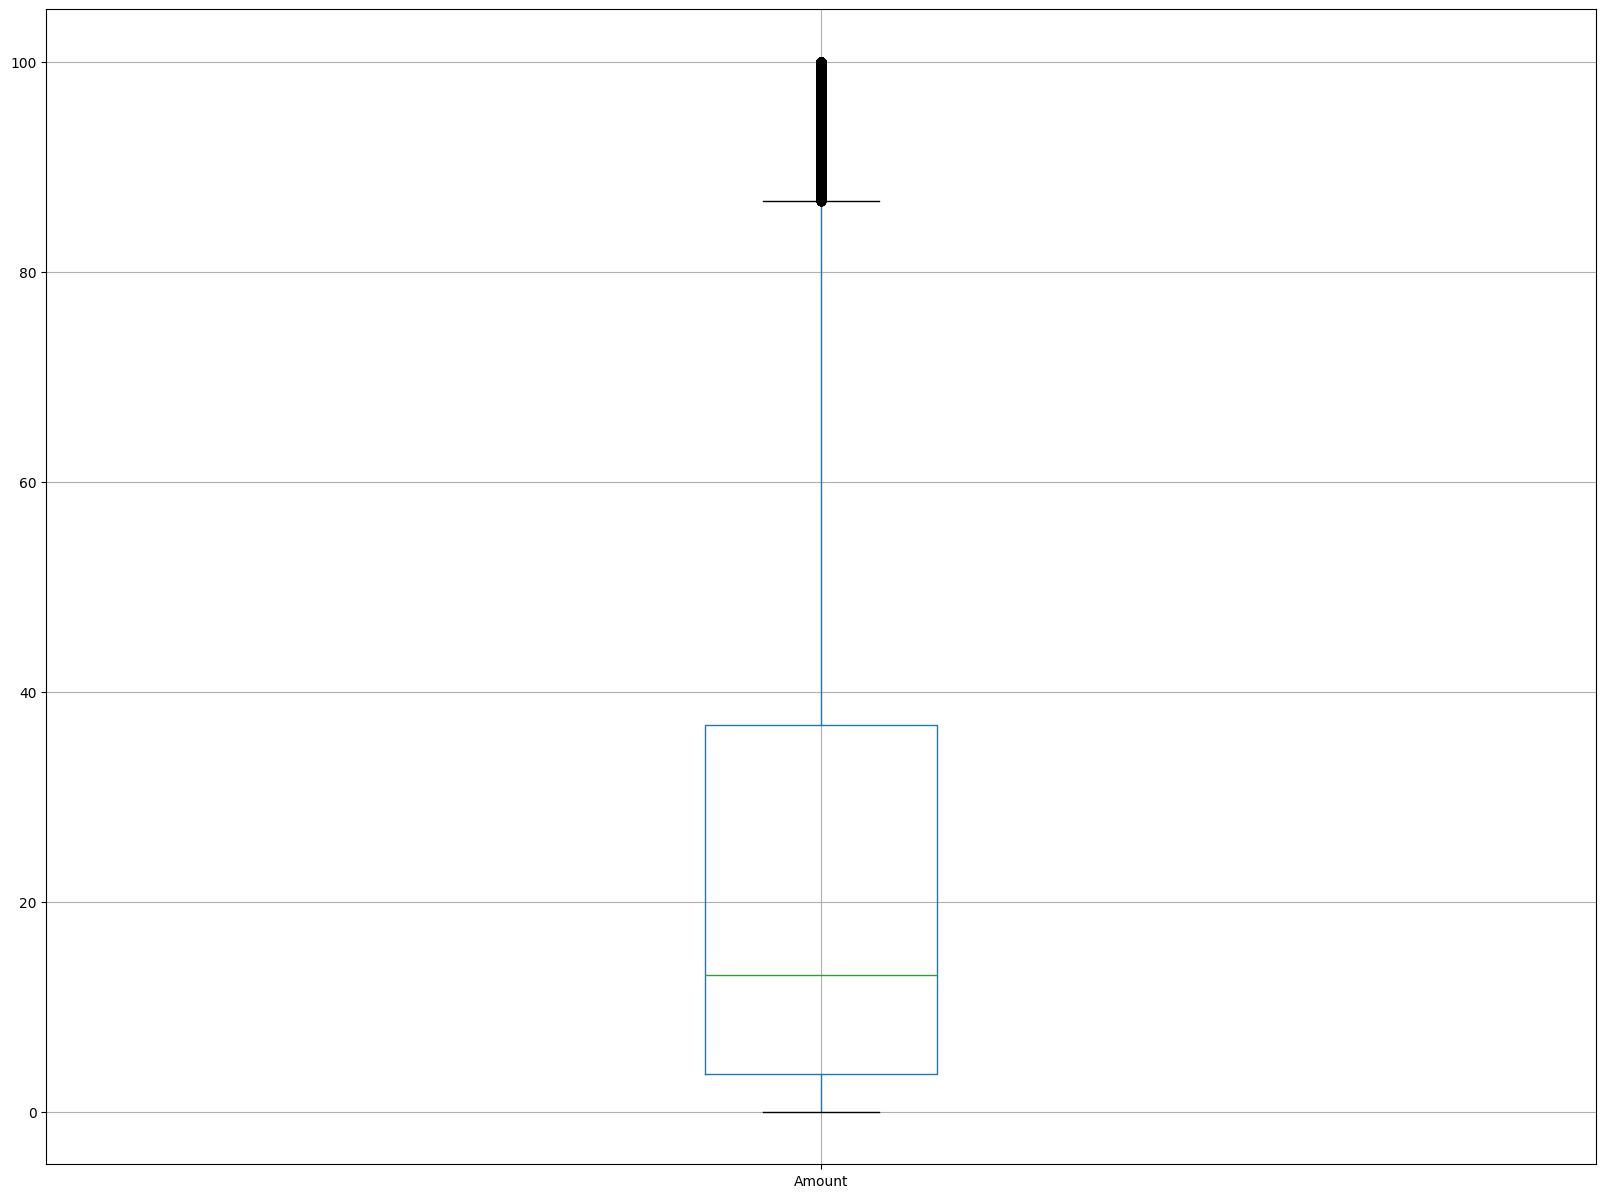

In [8]:
# most of the amount values are under 90
# but there are a lot of outliers. 20% of the data is above 90
print((data["Amount"] > 90.0).sum()/ len(data))
data.loc[data["Amount"] < 100.0, ["Amount"]].boxplot(figsize=(20, 15))

In [9]:
# fraud is very rare in the dataset, only 0.17% of the transactions are frauds
# therefore this is a very imbalanced dataset
data["Class"].value_counts()/len(data)*100

Class
0    99.827075
1     0.172925
Name: count, dtype: float64

<Axes: >

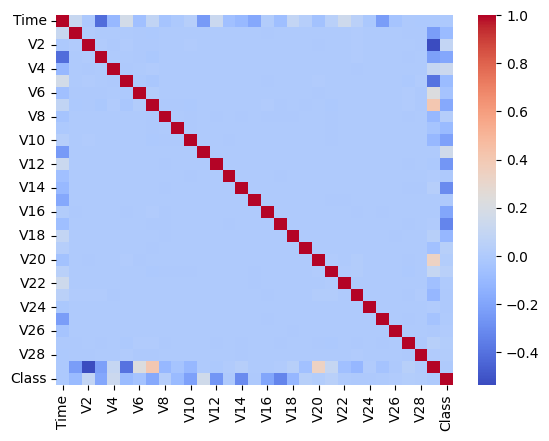

In [10]:
sns.heatmap(data.corr(), cmap='coolwarm')

In [11]:
stacked_corr = data.corr().stack().reset_index().rename(columns={0: 'Correlation'}).sort_values(by='Correlation', ascending=False)
stacked_corr = stacked_corr[(stacked_corr['Correlation'] > 0.1) & (stacked_corr['Correlation'] < 1.0)]
stacked_corr = stacked_corr.drop_duplicates(subset=['Correlation'], keep='first')
stacked_corr

,level_0,level_1,Correlation
906,Amount,V7,0.411463
919,Amount,V20,0.336028
215,V6,Amount,0.221781
155,V5,Time,0.171204
371,V11,Class,0.155963
682,V22,Time,0.144891
934,Class,V4,0.134112
12,Time,V12,0.125590
1,Time,V1,0.117203
903,Amount,V4,0.103808


<Axes: xlabel='V11', ylabel='V4'>

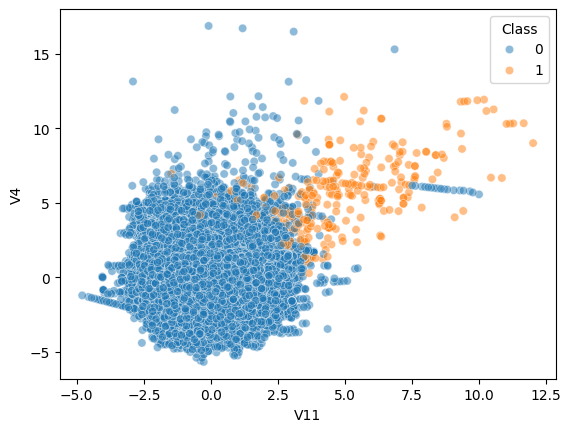

In [12]:
# there is a strong relationship between V11, V4 and the target variable Class
# when both V4 and V11 are high, the transaction is more likely to be fraud
sns.scatterplot(data=data, x="V11", y="V4", hue="Class", alpha=0.5)

<Axes: xlabel='V7', ylabel='Amount'>

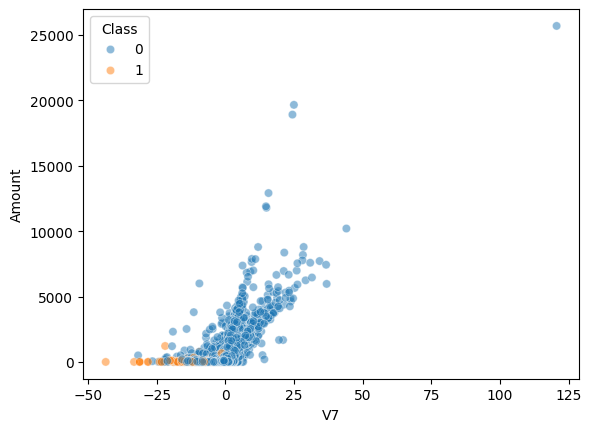

In [13]:
# there is a linear-ish relationship between V7 and Amount, when V7 is positive
# fraud cases are more likely to have a lower Amount and a negative V7
sns.scatterplot(data=data, x="V7", y="Amount", hue="Class", alpha=0.5)

<Axes: xlabel='V20', ylabel='Amount'>

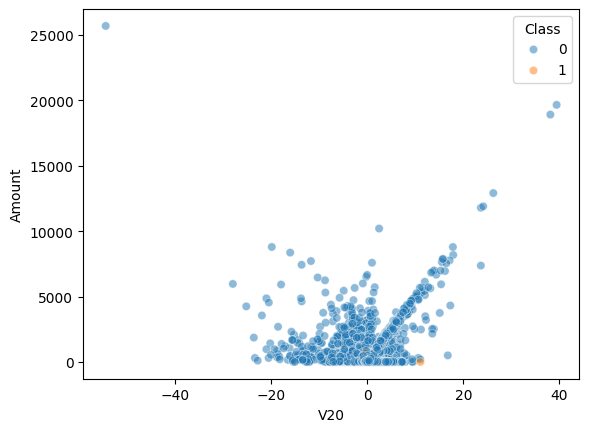

In [14]:
# no clear insights
sns.scatterplot(data=data, x="V20", y="Amount", hue="Class", alpha=0.5)

<Axes: xlabel='V6', ylabel='Amount'>

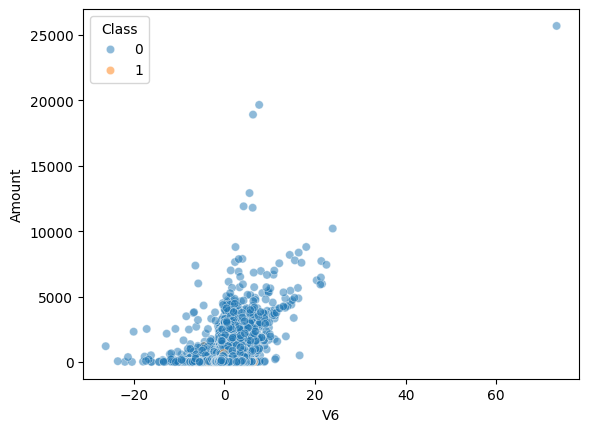

In [15]:
# no clear insights
sns.scatterplot(data=data, x="V6", y="Amount", hue="Class", alpha=0.5)